# Load packages

In [1]:
import pandas as pd
import numpy as np
from pandas import datetime
import os
import math
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import calendar
sns.set(color_codes=True)

# Load data

In [2]:
folder_path = './data/'

In [3]:
# read data
acorn_merge = pd.read_csv(folder_path + 'acorn_merge_cleaned.csv')
acorn_merge.head()

,LCLid,energy_sum,Acorn,electricity,recycle,water,adult,child,elderly,attitude,...,<20k,>100k,average_level,internet_high,internet_low,internet_med,not_tv,tv,attitude_per,environment_group_per
0,MAC000002,12.096094,ACORN-A,0.058171,0.064323,0.063031,0.048746,0.058293,0.071493,0.0,...,0.01115,0.275769,0.113306,0.064831,0.040198,0.043906,0.060944,0.060048,0.055359,0.084095
1,MAC000030,11.146685,ACORN-A,0.058171,0.064323,0.063031,0.048746,0.058293,0.071493,0.0,...,0.01115,0.275769,0.113306,0.064831,0.040198,0.043906,0.060944,0.060048,0.055359,0.084095
2,MAC000040,26.915465,ACORN-A,0.058171,0.064323,0.063031,0.048746,0.058293,0.071493,0.0,...,0.01115,0.275769,0.113306,0.064831,0.040198,0.043906,0.060944,0.060048,0.055359,0.084095
3,MAC000103,23.544304,ACORN-A,0.058171,0.064323,0.063031,0.048746,0.058293,0.071493,0.0,...,0.01115,0.275769,0.113306,0.064831,0.040198,0.043906,0.060944,0.060048,0.055359,0.084095
4,MAC000110,16.109455,ACORN-A,0.058171,0.064323,0.063031,0.048746,0.058293,0.071493,0.0,...,0.01115,0.275769,0.113306,0.064831,0.040198,0.043906,0.060944,0.060048,0.055359,0.084095


In [4]:
acorn_grouped = acorn_merge.drop('LCLid',axis=1).groupby('Acorn').mean().reset_index()
acorn_grouped

,Acorn,energy_sum,electricity,recycle,water,adult,child,elderly,attitude,car_0,...,<20k,>100k,average_level,internet_high,internet_low,internet_med,not_tv,tv,attitude_per,environment_group_per
0,ACORN-A,17.069909,0.058171,0.064323,0.063031,0.048746,0.058293,0.071493,0.0,0.011593,...,0.011150,0.275769,0.113306,0.064831,0.040198,0.043906,0.060944,0.060048,0.055359,0.084095
1,ACORN-B,12.359761,0.059651,0.063011,0.064790,0.051596,0.057692,0.067270,0.0,0.013105,...,0.017606,0.179169,0.094712,0.064831,0.031960,0.035387,0.058083,0.065398,0.054181,0.079220
2,ACORN-C,12.040996,0.061723,0.062427,0.063618,0.048461,0.047776,0.093213,0.0,0.012097,...,0.038146,0.070696,0.067984,0.059667,0.049423,0.048493,0.050072,0.055886,0.055359,0.078611
3,ACORN-D,13.489831,0.055062,0.062865,0.059513,0.071266,0.050781,0.031373,0.0,0.104839,...,0.025235,0.144091,0.085997,0.067699,0.018451,0.022280,0.077825,0.063020,0.057126,0.094455
4,ACORN-E,10.295482,0.058022,0.058926,0.061566,0.064282,0.064303,0.035596,0.0,0.059476,...,0.032277,0.082029,0.073213,0.065404,0.025041,0.036697,0.076109,0.067182,0.055948,0.082267
5,ACORN-F,9.189561,0.062463,0.067095,0.063911,0.050741,0.051683,0.078733,0.0,0.024194,...,0.045775,0.039935,0.059849,0.059094,0.049753,0.053080,0.045780,0.052319,0.058893,0.065814
6,ACORN-G,9.938336,0.060539,0.060823,0.061272,0.054732,0.059796,0.062142,1.0,0.015625,...,0.035211,0.064220,0.068565,0.061388,0.042175,0.060288,0.056080,0.057669,0.061249,0.068251
7,ACORN-H,11.133082,0.060983,0.059802,0.059513,0.055160,0.060998,0.060332,0.0,0.023185,...,0.042840,0.043173,0.061592,0.059667,0.051071,0.062254,0.054649,0.067776,0.058893,0.048141
8,ACORN-I,9.600134,0.065275,0.060968,0.063031,0.044612,0.039062,0.121267,1.0,0.023690,...,0.076878,0.012952,0.043579,0.050488,0.093904,0.060288,0.034907,0.051130,0.060071,0.040219
9,ACORN-J,11.033540,0.059651,0.059947,0.061566,0.062286,0.064303,0.041629,0.0,0.024194,...,0.041080,0.042094,0.062173,0.062536,0.035255,0.057667,0.065236,0.065398,0.058893,0.060938


In [5]:
correlation = acorn_grouped.corr()
correlation.sort_values('energy_sum',ascending=False)

,energy_sum,electricity,recycle,water,adult,child,elderly,attitude,car_0,car_1,...,<20k,>100k,average_level,internet_high,internet_low,internet_med,not_tv,tv,attitude_per,environment_group_per
energy_sum,1.000000,0.013304,0.673863,0.573938,-0.110996,-0.342345,0.137093,-0.612377,-0.511480,-0.432392,...,-0.746176,0.885886,0.875567,0.548294,-0.544017,-0.647893,0.202994,0.365575,-0.749604,0.733295
>100k,0.885886,-0.023249,0.627542,0.601039,-0.181082,-0.141166,0.062582,-0.504766,-0.417504,-0.632387,...,-0.749693,1.000000,0.948283,0.600020,-0.548844,-0.619791,0.223369,0.405620,-0.774440,0.752979
average_level,0.875567,0.048274,0.736767,0.724451,-0.137248,-0.185552,0.026570,-0.624225,-0.575240,-0.618428,...,-0.919235,0.948283,1.000000,0.754762,-0.741072,-0.723938,0.272562,0.505535,-0.827138,0.844548
80k-100k,0.869444,0.053327,0.730579,0.725426,-0.166319,-0.181207,0.047105,-0.600479,-0.537156,-0.662303,...,-0.878801,0.962852,0.992832,0.710269,-0.694347,-0.716994,0.253811,0.505357,-0.828363,0.847499
saving,0.839730,0.101712,0.800828,0.780722,-0.068625,-0.436095,0.131863,-0.622851,-0.595875,-0.611099,...,-0.923919,0.863577,0.950969,0.764079,-0.779108,-0.837317,0.233461,0.363419,-0.819956,0.871778
60k-80k,0.811819,0.112499,0.782051,0.786091,-0.122986,-0.212089,0.018516,-0.664371,-0.634109,-0.617775,...,-0.960034,0.861806,0.973788,0.786064,-0.804673,-0.761813,0.275994,0.560109,-0.819546,0.874775
bed_4,0.805748,-0.153084,0.517877,0.458591,0.004724,-0.253520,0.040954,-0.498583,-0.390853,-0.658574,...,-0.659281,0.892539,0.833001,0.591981,-0.542556,-0.598487,0.247525,0.165876,-0.698530,0.671441
environment_group_per,0.733295,-0.171709,0.687887,0.610427,0.197193,-0.419045,-0.120614,-0.724741,-0.352137,-0.639139,...,-0.818004,0.752979,0.844548,0.799371,-0.830462,-0.918043,0.489525,0.326804,-0.812529,1.000000
recycle,0.673863,0.500559,1.000000,0.909541,-0.387545,-0.503435,0.479118,-0.568481,-0.763363,-0.455809,...,-0.753062,0.627542,0.736767,0.396080,-0.488786,-0.638154,-0.206299,0.140343,-0.624929,0.687887
car_3,0.626062,0.317890,0.809842,0.782811,-0.212621,-0.436467,0.341672,-0.592410,-0.773204,-0.434928,...,-0.741453,0.582822,0.696819,0.481153,-0.560593,-0.645406,-0.069674,0.147956,-0.740740,0.672286


# EDA for economical features

* Wealthier people tend to be more concerned about environmental issues (attitude=0: don’t care, attitude=1: care).
* Based on the bar plot, economical features (income, car ownership and financial situation) have a positive relationship with electricity consumption. The higher people’s income is, the more electricity they consume. The reason might be that wealthier people care less about the cost of electricity.
* Although the attitude towards energy-saving tends to reduce electricity consumption, economic features dominate electricity consumption.
* Based on correlation matrix and the first barplot, geographical features do not have a strong relationship with electricity consumption.

In [6]:
# financial situation, car,income,economic activity, geography

categories = {
    'geography': ['england', 'northern_ireland', 'scotland', 'wales'],
    'car': ['car_0', 'car_1', 'car_2', 'car_3'],
    'income': ['<20k',  '20k-40k',  '40k-60k',  '60k-80k',  '80k-100k',  '>100k',  'average_level'],
    'saving': ['saving', 'not_saving']
}

In [7]:
def plot_bar(data, key, value, ax, group=None, group_value=None):
    '''
    Plot bar charts for Acorn features and line for energy consumption
    Args:
        data(df): the whole dataset, or at least contains ['Acorn','energy_sum', features want to plot]
        key(string): the large category of feature. e.g.: car
        value(list): the values in the category. e.g.: 'car_0', 'car_1', 'car_2', 'car_3'
        ax: plot ax
        group(None/string): should either be 'attitude' or 'environment_group'
                If None, only one plot for each category
                If not None, two plots for each category
        group_value(None/num/string): 0/1 or Yes/No. should be None if group=None
    '''
    ax2=ax.twinx()
    data[['Acorn','energy_sum']].set_index('Acorn').plot(kind='line',
                                                         linestyle='-', marker='o', markeredgecolor='white',
                                                         ax=ax2, grid=False)
    data[['Acorn']+value].set_index('Acorn').plot(kind='bar',stacked=True,ax=ax)
    p1, labels1 = ax.get_legend_handles_labels()
    p2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(p1 + p2, labels1 + labels2, loc = 0)
    ax.get_legend().remove()
    ax2.set_ylim(6,18)
    if group == None:
        ax.set_title(key)
    else:
        ax.set_title('{key} ({group}: {group_value})'.format(key=key,
                                                             group=group,
                                                             group_value=group_value))

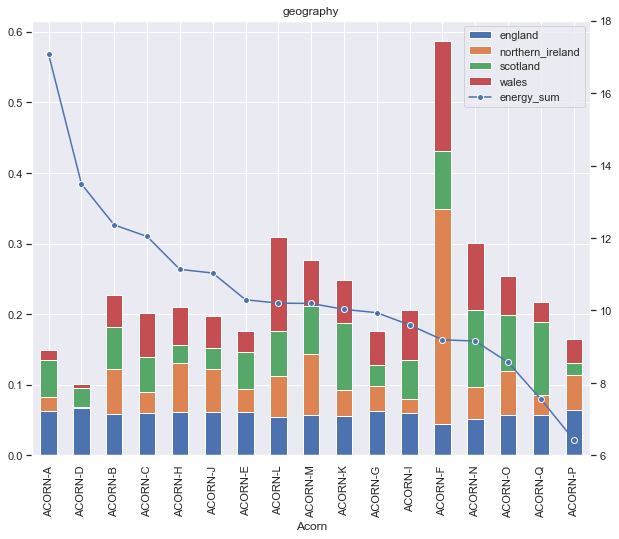

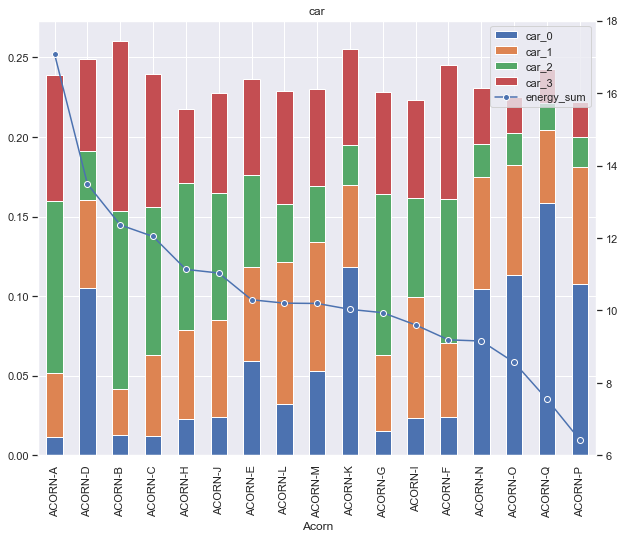

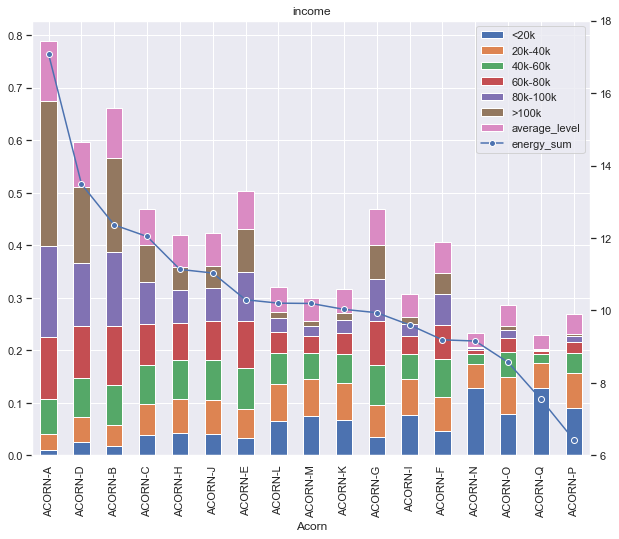

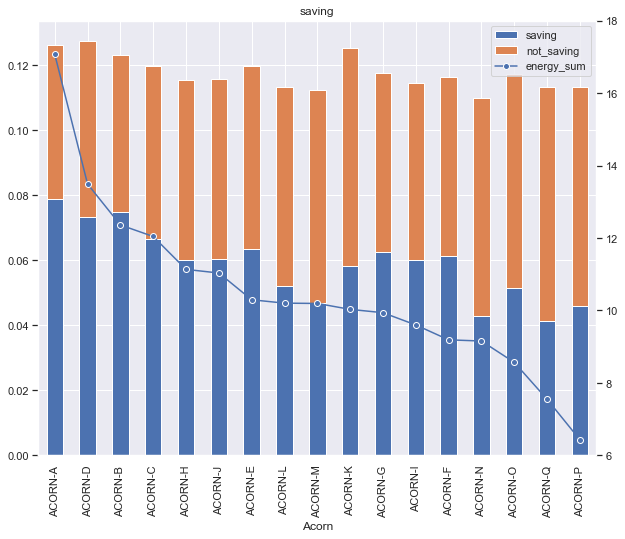

In [8]:
for key,value in categories.items():
    sns.set()
    fig,ax=plt.subplots(figsize=(10,8))
    tmp = acorn_grouped[['Acorn','energy_sum']+value].groupby('Acorn').max().reset_index() \
            .sort_values(by='energy_sum', ascending=False)
    plot_bar(tmp,key,value,ax) 

* drop `not_saving` (saving), `average_level` (income)

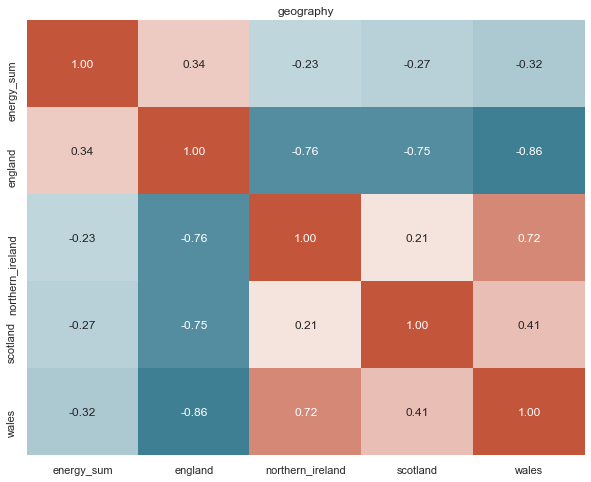

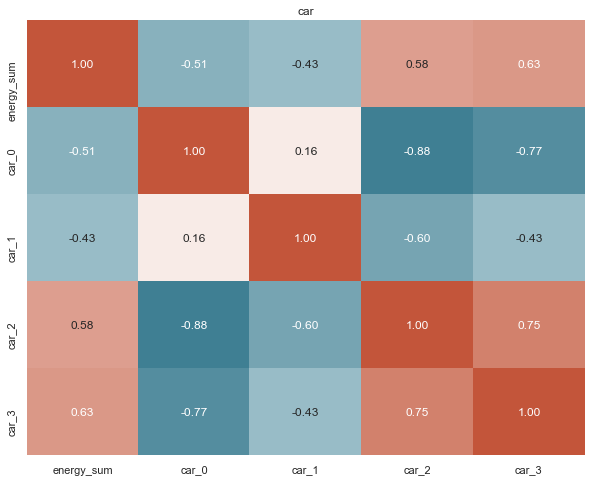

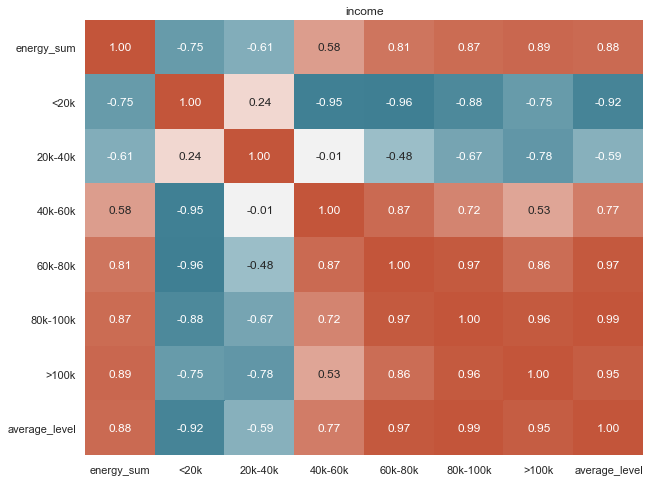

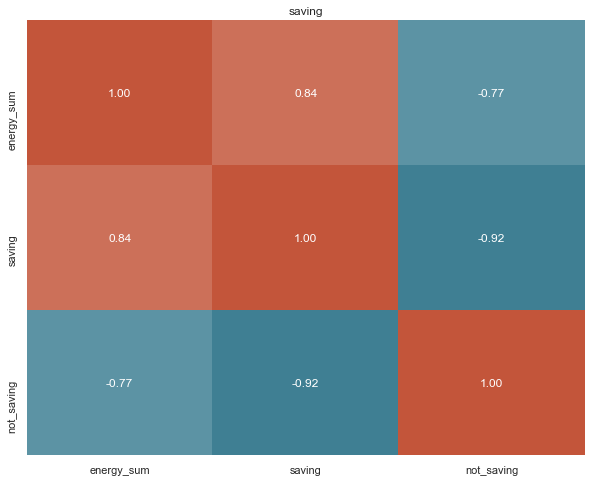

In [9]:
for key,value in categories.items():
    corr = acorn_grouped[['energy_sum'] + value].corr() 
    fig,ax=plt.subplots(figsize=(10,8))
    cm = sns.light_palette("green", as_cmap=True) 
    cm = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
    sns.heatmap(corr, annot=True, fmt='.2f',cmap=cm, cbar=False, ax=ax);
    ax.set_title(key)

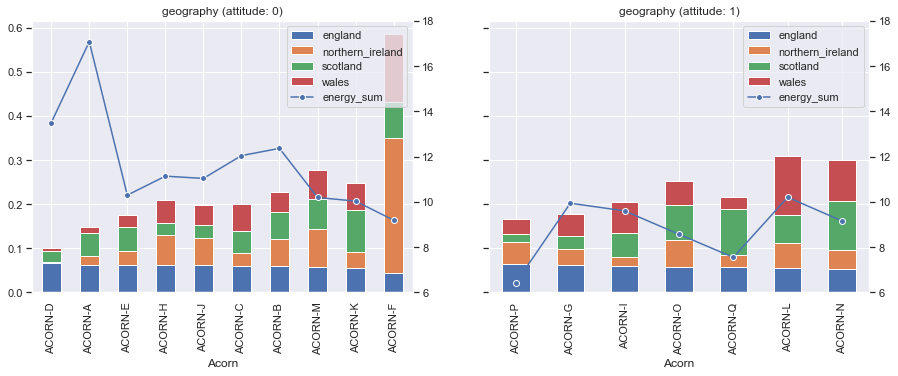

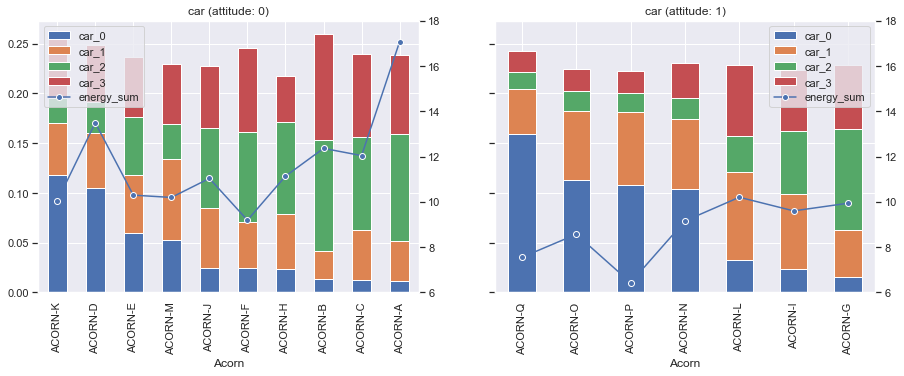

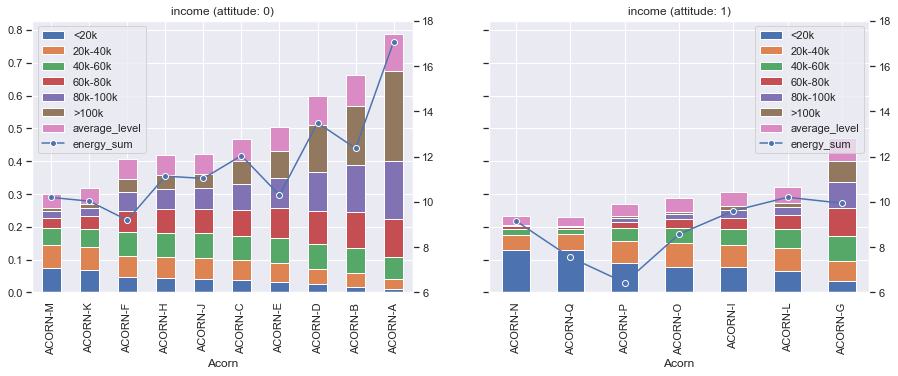

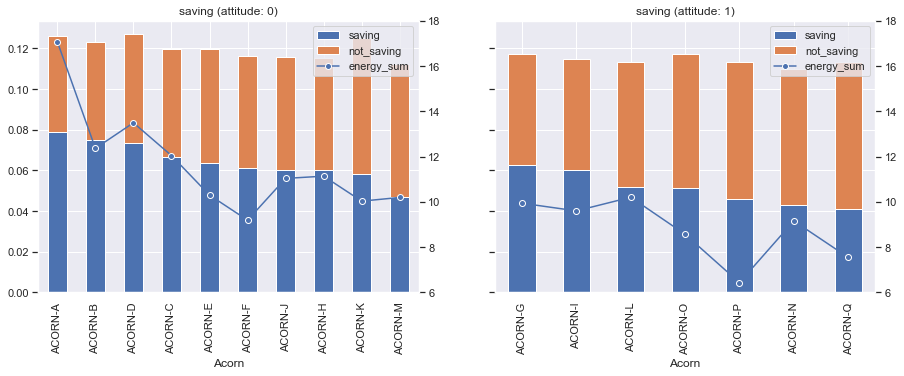

In [10]:
for key,value in categories.items():
    sns.set()
    fig,ax=plt.subplots(1, 2, figsize=(15,5), sharey=True)
    tmp = acorn_grouped[['Acorn','energy_sum','attitude']+value].groupby('Acorn').max().reset_index() \
            .sort_values(by=value, ascending=False)
    plot_bar(tmp[tmp['attitude']==0], key, value, ax[0], 'attitude', 0)
    plot_bar(tmp[tmp['attitude']==1], key, value, ax[1], 'attitude', 1)

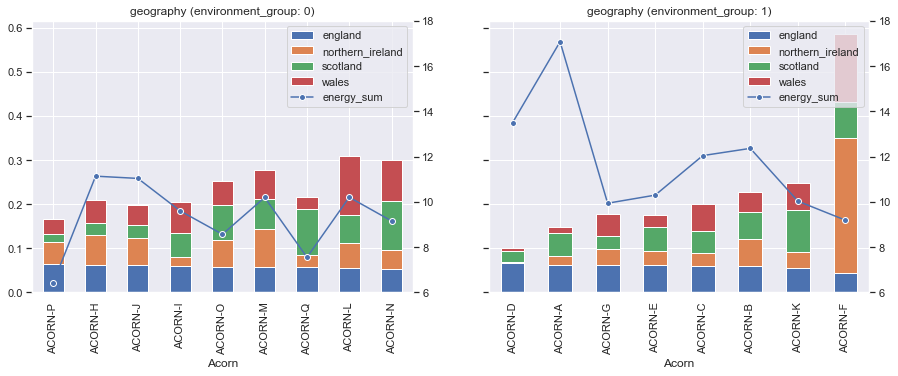

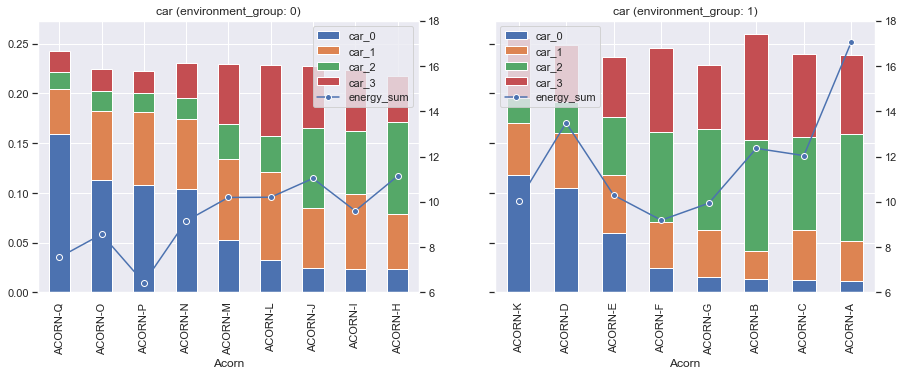

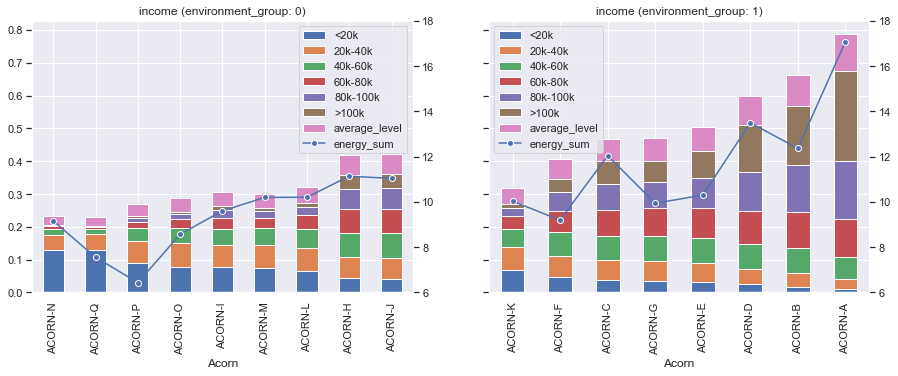

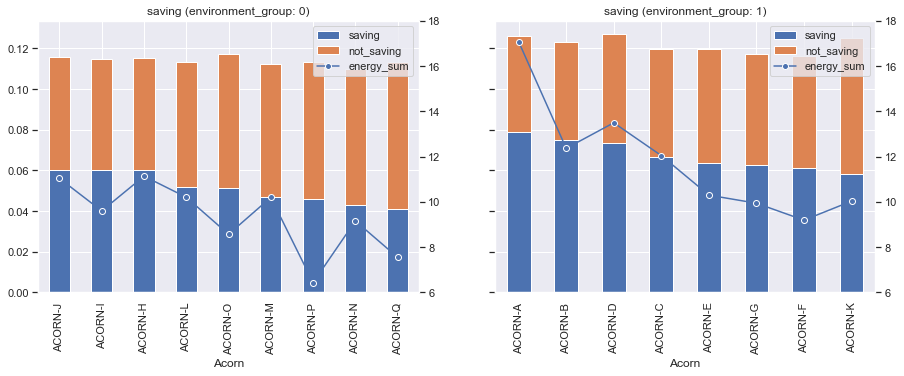

In [11]:
for key,value in categories.items():
    sns.set()
    fig,ax=plt.subplots(1, 2, figsize=(15,5), sharey=True)
    tmp = acorn_grouped[['Acorn','energy_sum','environment_group']+value].groupby('Acorn').max().reset_index() \
            .sort_values(by=value, ascending=False)
    plot_bar(tmp[tmp['environment_group']==0], key, value, ax[0], 'environment_group', 0)
    plot_bar(tmp[tmp['environment_group']==1], key, value, ax[1], 'environment_group', 1) 

In [12]:
def plot_percentage(data,features):
    '''
    Code from Nandhitha.
    Plot lines for two features, x axis is Acorn group, y axis is feature value
    Args:
        data(df): the whole dataset or should at least have ['Acorn', 2 features want to plot]
        features(list): length=2. 2 features want to plot
    '''
    fig, ax1 = plt.subplots(figsize = (10,5))
    ax1.plot(data['Acorn'], data[features[0]],'-o', color = 'tab:orange')
    ax1.set_ylabel(features[0],color = 'tab:orange')
    ax2 = ax1.twinx()
    ax2.plot(data['Acorn'], data[features[1]],'-o',color = 'tab:blue')
    ax2.grid(False)
    ax2.set_ylabel(features[1],color = 'tab:blue')
    if len(data['attitude'].unique())==1:
        plt.title('{feature1} and {feature2} (attitude={attitude})'.format(feature1=features[0],
                                                                           feature2=features[1],
                                                                           attitude=data['attitude'].unique()[0]))
    else:
        plt.title('{feature1} and {feature2}'.format(feature1=features[0],feature2=features[1]))
    fig.autofmt_xdate(rotation=45)
    fig.tight_layout()
    plt.show()

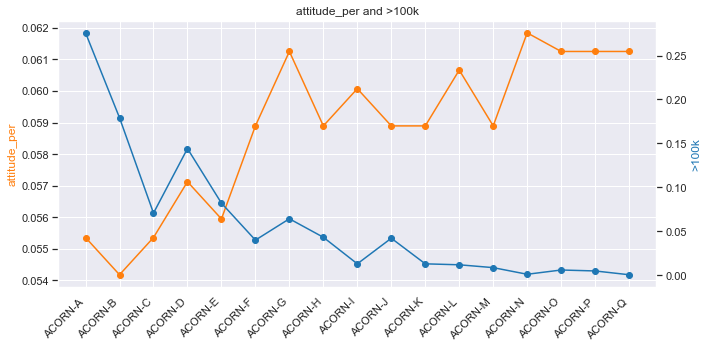

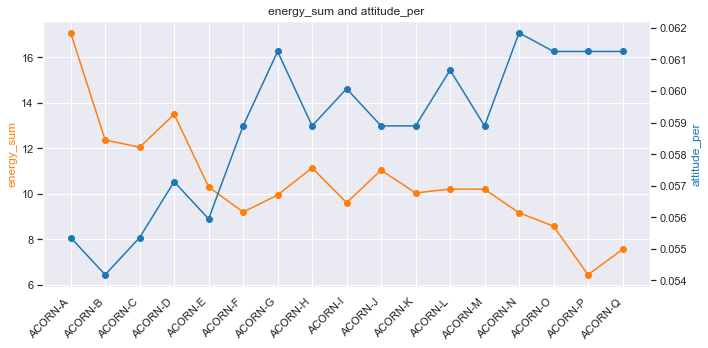

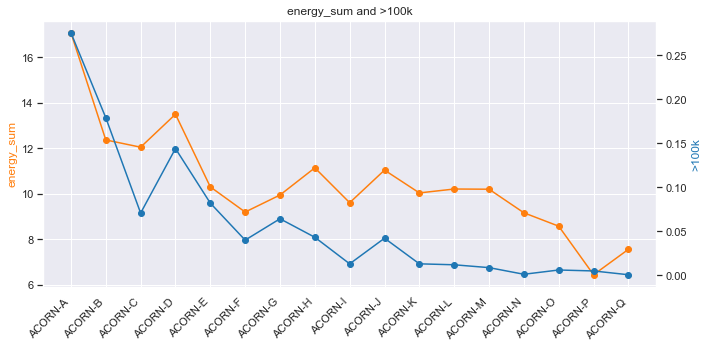

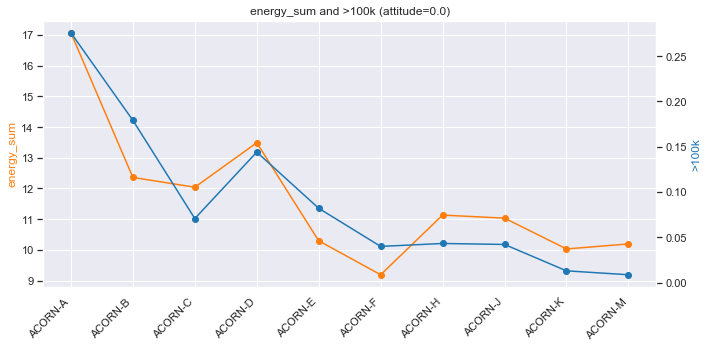

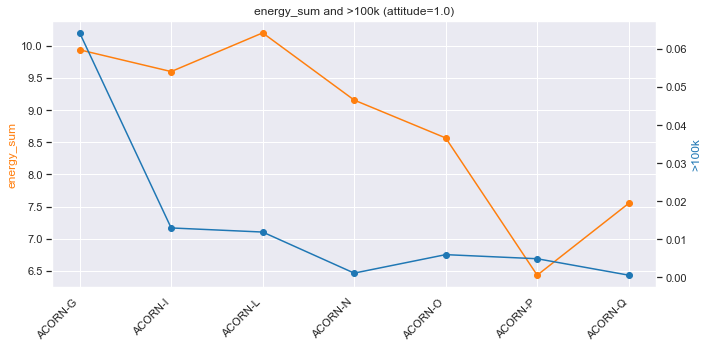

In [13]:
# plot_percentage(acorn_grouped,['attitude_per','<20k'])
plot_percentage(acorn_grouped,['attitude_per','>100k'])
plot_percentage(acorn_grouped,['energy_sum','attitude_per'])
plot_percentage(acorn_grouped,['energy_sum','>100k'])
plot_percentage(acorn_grouped[acorn_grouped.attitude==0],['energy_sum','>100k'])
plot_percentage(acorn_grouped[acorn_grouped.attitude==1],['energy_sum','>100k'])

## PCA

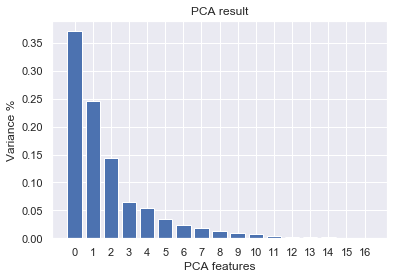

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

drop_list = ['not_saving','average_level']

pca_scaled = make_pipeline(StandardScaler(), PCA(n_components=17))
acorn_pca = pca_scaled.fit_transform(acorn_grouped.drop(drop_list+['Acorn','energy_sum'],1))

# Plot the explained variances
features = range(pca_scaled.steps[1][1].n_components_)
plt.bar(features, pca_scaled.steps[1][1].explained_variance_ratio_)
plt.xlabel('PCA features')
plt.ylabel('Variance %')
plt.xticks(features);
plt.title('PCA result')
# Save components to a DataFrame
PCA_components = pd.DataFrame(acorn_pca)

# Regression

In [15]:
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

In [17]:
param_grid=[{'regressor':[LinearRegression()]},
            {'regressor':[ElasticNet(tol=1)],
             'regressor__alpha': np.logspace(-1,1,3),
             'regressor__l1_ratio': [0, .1, .5, .98, 1]},
            {'regressor':[LinearSVR(tol=1)],
             'regressor__C':np.logspace(-5,1,7)}]

lr = LinearRegression()


y = acorn_merge['energy_sum']
X = acorn_merge.iloc[:,3:].drop(['attitude','environment_group'], axis=1)
# # numeric = X.columns.tolist().remove(['attitude','environment_group'])


X_train, X_test, y_train,  y_test = train_test_split(X, y, random_state=1)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

preprocess=make_column_transformer((StandardScaler(),X.columns.tolist()),
                                   remainder='passthrough')

pipeline = Pipeline([('preprocess',preprocess),
                     ('regressor',LinearRegression())])

grid = GridSearchCV(pipeline, param_grid, return_train_score=True, cv=5)
grid.fit(X_train, y_train)
grid.best_estimator_
score = grid.score(X_test, y_test)

In [18]:
score

0.06630416621783664